<h1>COSIpy API testing for GRB dataset</h1>

<h3>Import COSIpy</h3>

In [119]:
from COSIpy import *
plt.style.use('thomas')

<h3>Where to find the data and init COSIpy analysis object</h3>

In [306]:
data_dir = 'data'
filename = 'grb_full_merge_OnTimes_0050-2000keV_noEHC_CSA.tra'

analysis = COSIpy(data_dir,filename)

In [307]:
analysis.dataset.data_info

Data set not read in, use read_COSI_DataSet() first.


In [308]:
analysis.dataset.available_attributes

name
data


<h3>Read in data</h3>

In [309]:
analysis.read_COSI_DataSet()

In [310]:
analysis.dataset.data_info

Full filename: data/grb_full_merge_OnTimes_0050-2000keV_noEHC_CSA.tra
                          mean            std            min            max
      Energies:        545.442        370.236        154.527       1919.634
      TimeTags: 1464591834.355          4.674 1464591827.119 1464591843.992
    Xpointings:          1.412          1.557         -0.168          3.023
    Ypointings:          0.144          1.063         -0.937          1.356
    Zpointings:         -1.134          0.503         -1.639         -0.629
           Phi:          0.704          0.240          0.119          1.047
     Chi local:          3.350          1.825          0.000          6.247
     Psi local:          1.501          0.608          0.083          3.142
      Distance:          2.673          2.764          0.500         19.495
  Chi galactic:          0.140          1.762         -3.141          3.127
  Psi galactic:          1.546          0.676          0.078          3.094


In [311]:
analysis.dataset.available_attributes

name
data


In [312]:
data = analysis.dataset.data
data

{'Full filename': 'data/grb_full_merge_OnTimes_0050-2000keV_noEHC_CSA.tra',
 'Energies': array([1595.611 ,  646.0584,  579.0559,  664.955 ,  496.638 ,  766.65  ,
         300.3107,  463.8922,  482.648 , 1481.309 , 1845.842 ,  198.6368,
         771.882 ,  290.2549,  528.005 ,  354.254 ,  933.03  ,  530.524 ,
         232.6607,  191.4299,  472.9138,  768.487 ,  562.531 ,  659.9837,
        1149.601 ,  475.125 ,  250.9877, 1872.041 ,  400.851 ,  480.6584,
         436.455 ,  234.4231,  324.7396,  917.6555,  436.521 ,  381.7993,
         297.4515,  365.3804,  359.4235,  347.9649,  452.4124,  294.634 ,
         266.2232,  203.8622,  585.014 ,  370.5461,  298.3188,  267.5337,
         636.017 ,  190.11  ,  245.7736,  175.4392,  204.8714,  271.4941,
         241.7317,  294.1117,  425.7128,  247.4238,  584.696 ,  383.918 ,
         331.4091,  637.6736,  539.8179,  498.091 ,  626.224 ,  406.1938,
         377.0747,  458.3698,  900.046 ,  345.0269,  653.8082, 1237.448 ,
        1237.187 ,  510.

<h3>Plot raw spectrum</h3>

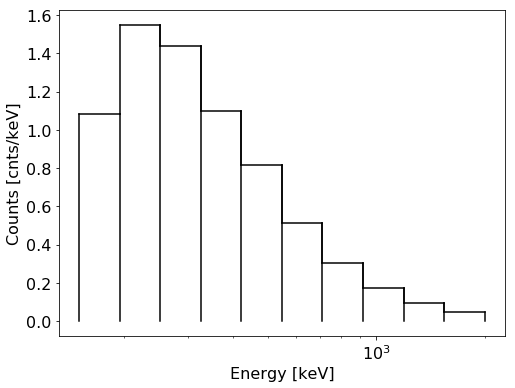

In [314]:
analysis.plot_raw_spectrum(bins=np.logspace(np.log10(150),np.log10(2000),11))
plt.xscale('log')

In [315]:
l_crab, b_crab = 184.55745396-360, -05.78436864
l_cygx1, b_cygx1 = 071.3349918859785, +03.0668340708770
l_GC, b_GC = 0, 0
l_test, b_test = -10, -10

l_GRB, b_GRB = 243.4-360, 0.4

In [316]:
l_src = [l_crab,l_cygx1,l_GC,l_test,l_GRB]
b_src = [b_crab,b_cygx1,b_GC,b_test,b_GRB]
name_src = ['Crab','Cyg X-1','Galactic Centre','Test SRC','GRB160530A']

In [317]:
analysis.available_attributes

data_dir
filename
horizon
dataset


<h3>Plot Elevation of defined objects</h3>

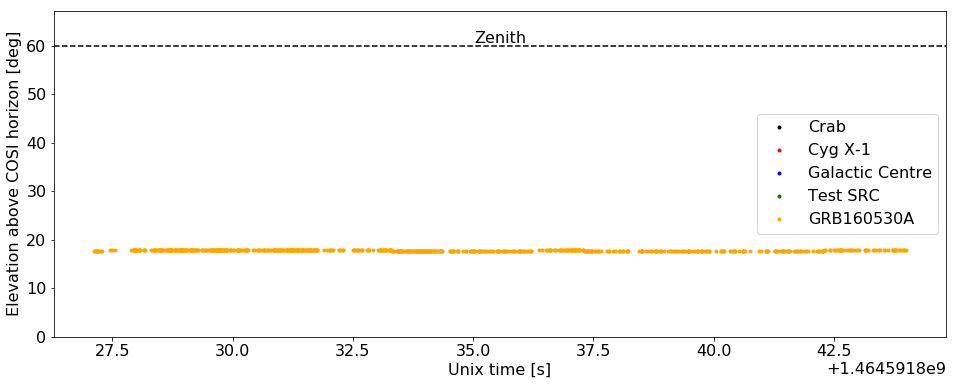

In [318]:
analysis.plot_elevation(l_src,b_src,name_src)

<h3>Plot flight path in data set and sources</h3>

(-90, 90)

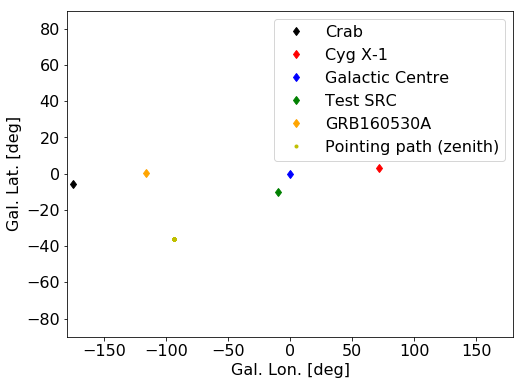

In [319]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for l,b,name in zip(l_src,b_src,name_src):
    ax.plot(l,b,'d',label=name)

ax.plot(analysis.dataset.l_pointing,analysis.dataset.b_pointing,'y.',label='Pointing path (zenith)')
ax.legend()
ax.set_xlabel('Gal. Lon. [deg]')
ax.set_ylabel('Gal. Lat. [deg]')
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)


<h3>Plot lightcurve</h3>

Time tags not binned, yet, binning for 1 hour intervals now ...


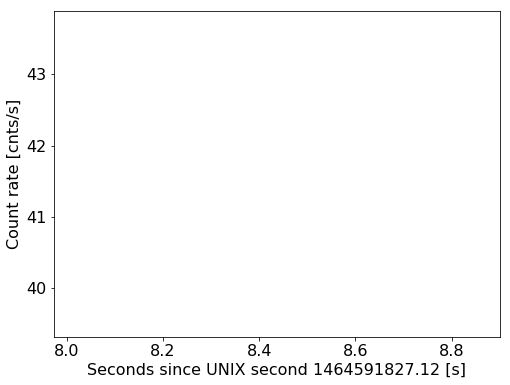

In [320]:
analysis.plot_lightcurve()

In [322]:
energy_bin_edges=np.logspace(np.log10(150),np.log10(2000),11)

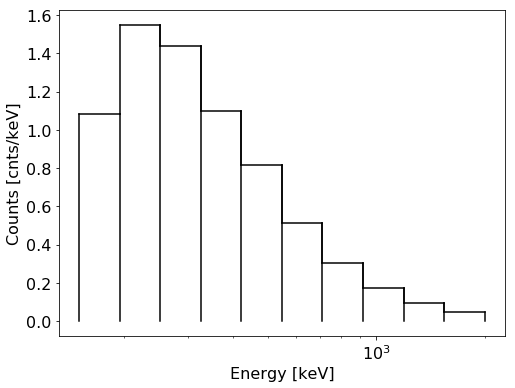

In [323]:
analysis.plot_raw_spectrum(bins=energy_bin_edges)
plt.xscale('log')

<h3>Define time binning</h3>

In [509]:
analysis.dataset.time_binning_tags(time_bin_size=20)

In [395]:
analysis.dataset.plot_raw_spectrum()
analysis.dataset.plot_raw_spectrum('all')
analysis.dataset.plot_raw_spectrum(12)

The binning was updated since the last call! Run time_binning_tags() for your current binning.
The binning was updated since the last call! Run time_binning_tags() for your current binning.
The binning was updated since the last call! Run time_binning_tags() for your current binning.


<h3>Define energy binning</h3>

In [510]:
analysis.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                              pixel_size=5.)

In [511]:
analysis.dataset.get_binned_data()

In [512]:
analysis.dataset.binned_data.shape

(1, 10, 36, 1650)

In [513]:
analysis.dataset.times.n_time_bins

1

In [514]:
analysis.dataset.energies.n_energy_bins

10

In [515]:
analysis.dataset.phis.n_phi_bins

36

In [516]:
analysis.dataset.fisbels.n_fisbel_bins

1650

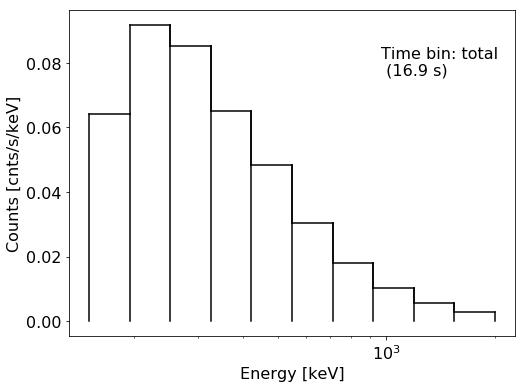

In [517]:
analysis.dataset.plot_raw_spectrum()
plt.xscale('log')
#analysis.dataset.plot_raw_spectrum(10)
#analysis.dataset.plot_raw_spectrum('all')

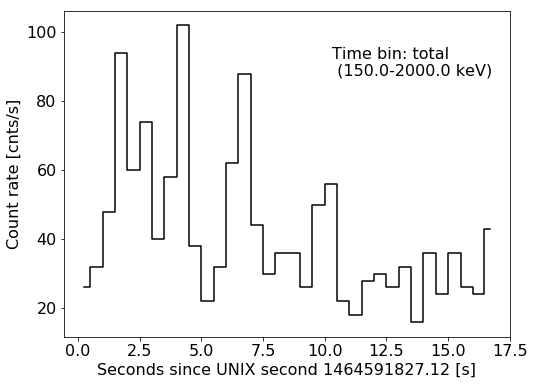

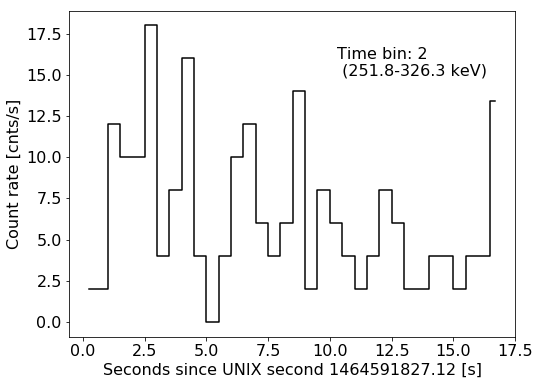

In [405]:
analysis.dataset.plot_lightcurve()
analysis.dataset.plot_lightcurve(2)
#analysis.dataset.plot_lightcurve('all')


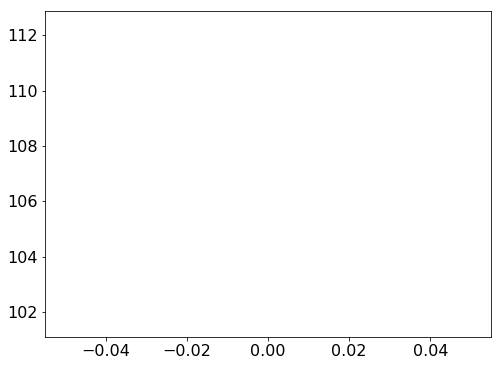

In [518]:
plt.plot(np.sum(analysis.dataset.binned_data[:,2,:,:],axis=(1,2)))

In [335]:
analysis.dataset.available_methods

['available_attributes', 'available_methods', 'data_info', 'get_binned_data', 'init_binning', 'init_spi', 'plot_', 'plot_elevation', 'plot_lightcurve', 'plot_raw_spectrum', 'read_COSI_DataSet', 'time_binning_tags']


<h3>Define Pointings in Dataset</h3>

In [406]:
pointings = Pointing(analysis.dataset)

In [407]:
pointings

<h3>Define Background from simulation</h3>

In [408]:
bg_filename = 'BG9dets_LingWithPeak_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz'
bg_filename = 'grb_full_merge.tra'
bg_data = COSIpy(data_dir,bg_filename)
bg_data.read_COSI_DataSet()

In [519]:
bg_data.dataset.time_binning_tags(time_bin_size=1e5)
bg_data.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                              pixel_size=5.)
bg_data.dataset.get_binned_data()

In [520]:
bg_data.dataset.binned_data[:,:,:,:].shape

(1, 10, 36, 1650)

In [521]:
background = BG(dataset=bg_data.dataset,
                tracer=np.repeat(1.,analysis.dataset.times.n_time_bins))#,tracer=0.8+0.30*np.cos(np.arange(25)/8-0.75)**2)

In [522]:
background

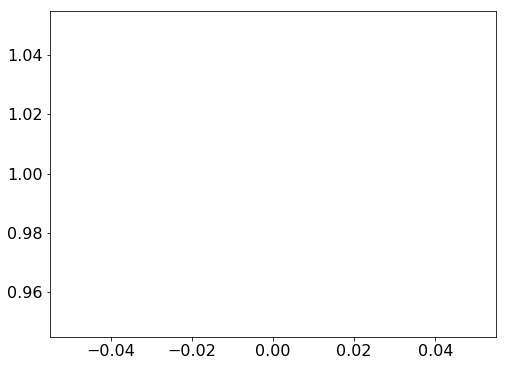

In [523]:
#plt.plot(background2.tracer)#-background.tracer)
plt.plot(background.tracer)

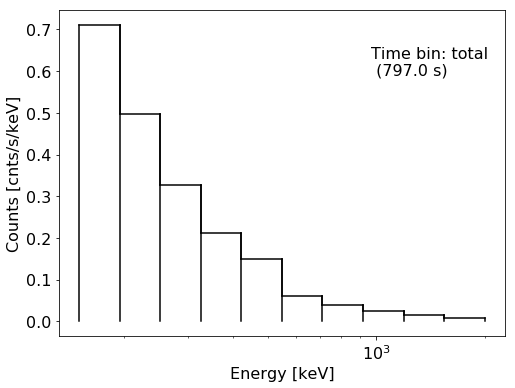

In [524]:
bg_data.dataset.plot_raw_spectrum()
plt.xscale('log')

In [525]:
background.idx_arr

array([1])

In [526]:
background.bg_cuts

array([1])

In [527]:
background.Ncuts

1

In [528]:
background.make_bg_cuts(dataset=analysis.dataset,
                        cuts=[])
                        #cuts=list(np.arange(24)+1))

In [529]:
background.idx_arr

array([1])

In [530]:
background.bg_cuts

array([1])

In [531]:
background.Ncuts

1

In [532]:
background.tracer

array([1.])

In [533]:
background.bg_response.shape

(10, 36, 1650)

In [534]:
analysis.dataset.binned_data.shape

(1, 10, 36, 1650)

<h3>Read in response</h3>

In [535]:
import response

In [536]:
rsp = response.SkyResponse('response/RegularResponseGrid_v1.npz',pixel_size=5.)

In [537]:
rsp.rsp.response_grid_normed.shape

(36, 72, 36, 1650)

<h3>Calculate Point Source Response</h3>

In [538]:
rsp.calculate_PS_response(analysis.dataset,
                          pointings,
                          l_GRB,b_GRB,
                          background=background,)

In [539]:
analysis.dataset.times.n_time_bins

1

In [540]:
np.sum(rsp.sky_response[4])

1.9644290697499986

In [541]:
background.bg_model.shape

(1, 10, 36, 1650)

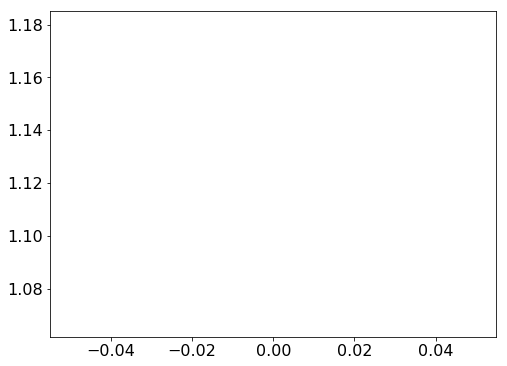

In [543]:
plt.plot(np.sum(rsp.sky_response[2],axis=1))

In [544]:
pointings.dtpoins

array([0.42382002, 0.07617998, 0.19341779, 0.30658221, 0.45903111,
       0.04096889, 0.48436165, 0.01563835, 0.47861838, 0.02138162,
       0.47548771, 0.02451229, 0.47768259, 0.02231741, 0.46544361,
       0.03455639, 0.49141932, 0.00858068, 0.44788718, 0.05211282,
       0.39894104, 0.10105896, 0.48670793, 0.01329207, 0.48429966,
       0.01570034, 0.49048567, 0.00951433, 0.4677527 , 0.0322473 ,
       0.44273424, 0.05726576, 0.48743892, 0.01256108, 0.45601177,
       0.04398823, 0.48024797, 0.01975203, 0.43378639, 0.06621361,
       0.49396634, 0.00603366, 0.46093535, 0.03906465, 0.39922237,
       0.10077763, 0.45001054, 0.04998946, 0.46103525, 0.03896475,
       0.4035387 , 0.0964613 , 0.45676088, 0.04323912, 0.45721817,
       0.04278183, 0.44510603, 0.05489397, 0.39744473, 0.10255527,
       0.4677155 , 0.0322845 , 0.404567  , 0.095433  , 0.42558765,
       0.07441235, 0.36915517, 0.00382686])

In [545]:
analysis.dataset.times.times_edges

array([ 0.        , 16.87298203])

In [546]:
for i in range(analysis.dataset.n_energy_bins):
    print(rsp.sky_response[i].shape,background.bg_model_reduced[i].shape)

(1, 8602) (1, 8602)
(1, 9994) (1, 9994)
(1, 9794) (1, 9794)
(1, 9100) (1, 9100)
(1, 9766) (1, 9766)
(1, 6481) (1, 6481)
(1, 5747) (1, 5747)
(1, 4851) (1, 4851)
(1, 3872) (1, 3872)
(1, 2913) (1, 2913)


<h3>Fitting class (TBD)</h3>

In [547]:
import pickle
import pystan

class fit():
    
    def __init__(self,dataset,pointings,response,background):
        self.dataset = dataset
        self.pointings = pointings
        self.response = response
        self.background = background
        self.count_data = self.reduce_dataset_CDS()
        self.data_per_energy_bin = self.make_dictionaries_for_stan()
        self.load_stan_model()
    
    
    def reduce_dataset_CDS(self):
        count_data_reduced = []
        for i in range(self.dataset.energies.n_energy_bins):

            # reshape count data to reduce CDS if possible
            # this combines the 3 CDS angles into a 1D array for all times at the chosen energy
            yp_tmp = self.dataset.binned_data[:,i,:,:].reshape(self.dataset.times.n_time_bins,
                                                          self.response.rsp.n_phi_bins*self.response.rsp.n_fisbel_bins)
    
            # reshape count data grid the same way as backgrorund and choose only non-zero indices
            yp_tmp = yp_tmp[:,self.background.calc_this[i]]

            count_data_reduced.append(yp_tmp)
            
        return count_data_reduced
    
    
    def make_dictionaries_for_stan(self):
        
        all_dicts = []
        
        for i in range(self.dataset.energies.n_energy_bins):
            Np, Nrsp = self.background.bg_model_reduced[i].shape         # initialise sizes of arrays
            N = Np*Nrsp                      # total number of data points

            mu_flux_scl = np.array([10000.])    # prior centroids for sky, we use 10 because we are ignorant;
            # this has to be an array because it could be more than one
            sigma_flux_scl = np.array([100000.]) # same for the width (so, easily 0 but also high values possible)
            mu_Abg = 10.                     # for the moment set to a useful value if bg model is ~normalised to data
            sigma_Abg = 10                   # same


            # dictionary for data set and prior
            data2D = dict(N = Nrsp,
                          Np = Np,
                          Nsky = 1,
                          Ncuts = self.background.Ncuts,
                          bg_cuts = self.background.bg_cuts,
                          bg_idx_arr = self.background.idx_arr,
                          y = self.count_data[i].ravel().astype(int),
                          bg_model = self.background.bg_model_reduced[i],
                          conv_sky = self.response.sky_response[i].reshape(1,Np,Nrsp)*1e-2, # this has to be reshaped because it could be more than one
                          mu_flux = mu_flux_scl,
                          sigma_flux = sigma_flux_scl,
                          mu_Abg = mu_Abg,
                          sigma_Abg = sigma_Abg)
            all_dicts.append(data2D)
            
        return all_dicts
    
    
    #@staticmethod
    def load_stan_model(self):
        try:
            #read COSImodefit.pkl (if already compiled)
            self.model = pickle.load(open('COSImodfit.pkl', 'rb'))
        except:
            print('Model not yet compiled, doing that now (might take a while).')
            ## compile model (if not yet compiled):
            self.model = pystan.StanModel('COSImodfit.stan')

            ## save it to the file 'filename.pkl' for later use
            with open('COSImodfit.pkl', 'wb') as f:
                pickle.dump(self.model, f)
    
    
    def MAP_solution(self):
        self.fit_pars_map = []
        self.diff_flux_map = np.zeros(self.dataset.energies.n_energy_bins)
        # loop over energy bins
        for i in tqdm(range(self.dataset.energies.n_energy_bins)):
            print('###################################################################')
            print('Start optimising energy bin '+str(i+1)+'/'+str(self.dataset.energies.n_energy_bins)+'...')
            
            if (np.nansum(self.data_per_energy_bin[i]['bg_model']) == 0):
                print('Energy bin '+str(i+1)+'/'+str(self.dataset.energies.n_energy_bins)+' cannot be fitted, skip...')
                self.fit_pars_map.append(np.nan)
            else:
                
                # not necessary in general, but good for quicklook MAP estimate
                init = {}
                init['flux'] = np.array([1.])
                init['Abg'] = np.repeat(1.,self.background.Ncuts)
                #start = time.time()
                op = self.model.optimizing(data=self.data_per_energy_bin[i],
                                           verbose=False,init=init,as_vector=False)#,tol_rel_grad=1e5)
                #print(time.time()-start)
                self.fit_pars_map.append(op)
                self.diff_flux_map[i] = self.fit_pars_map[i]['par']['flux']/self.dataset.energies.energy_bin_wid[i]/2
            
            
    def fit(self):
        self.fit_pars = []
        self.diff_flux = np.zeros(self.dataset.energies.n_energy_bins)
        self.diff_flux_err = np.zeros((self.dataset.energies.n_energy_bins,2))
        self.diff_flux_err2 = np.zeros((self.dataset.energies.n_energy_bins,2))
        # loop over energy bins
        for i in tqdm(range(self.dataset.energies.n_energy_bins)):
        #for i in tqdm(range(5)):
            print('###################################################################')
            print('\nStart fitting energy bin '+str(i+1)+'/'+str(self.dataset.energies.n_energy_bins)+'...')
            
            if (np.nansum(self.data_per_energy_bin[i]['bg_model']) == 0):
                print('Energy bin '+str(i+1)+'/'+str(self.dataset.energies.n_energy_bins)+' cannot be fitted, skip...')
                self.fit_pars.append(np.nan)
            else:
                #start = time.time()
                fit = self.model.sampling(data=self.data_per_energy_bin[i],
                                          chains=2,iter=1000,n_jobs=-1,verbose=False,
                                          pars=['flux','Abg'])
                print('Summary for energy bin '+str(i+1)+'/'+str(self.dataset.energies.n_energy_bins)+':\n')
                print(fit.stansummary(['flux','Abg']))
                #print(time.time()-start)
                self.fit_pars.append(fit)
                # median value es representative for spectrum
                self.diff_flux[i] = np.percentile(self.fit_pars[i]['flux'],50)/self.dataset.energies.energy_bin_wid[i]/2

                # 1sigma error bars
                # upper boundary uncertainty
                self.diff_flux_err[i,1] = np.percentile(self.fit_pars[i]['flux'],50+68.3/2)/self.dataset.energies.energy_bin_wid[i]/2 - self.diff_flux[i]
                # lower boundary uncertainty
                self.diff_flux_err[i,0] = np.percentile(self.fit_pars[i]['flux'],50-68.3/2)/self.dataset.energies.energy_bin_wid[i]/2 - self.diff_flux[i]

                # 2sigma error bars
                # upper boundary uncertainty
                self.diff_flux_err2[i,1] = np.percentile(self.fit_pars[i]['flux'],50+95.4/2)/self.dataset.energies.energy_bin_wid[i]/2 - self.diff_flux[i]
                # lower boundary uncertainty
                self.diff_flux_err2[i,0] = np.percentile(self.fit_pars[i]['flux'],50-95.4/2)/self.dataset.energies.energy_bin_wid[i]/2 - self.diff_flux[i]
            print('###################################################################')

In [465]:
result = fit(analysis.dataset,
             pointings,
             rsp,
             background)

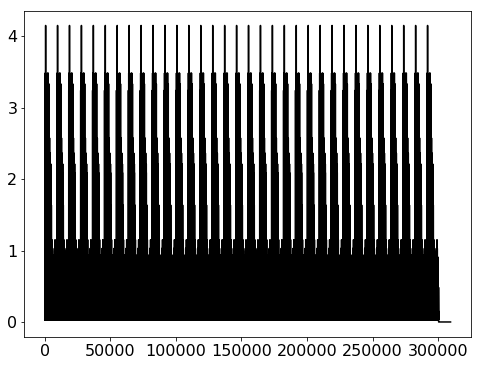

In [466]:
plt.plot(result.data_per_energy_bin[3]['bg_model'].ravel())

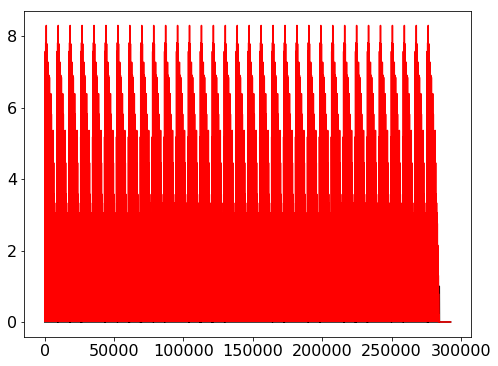

In [467]:
plt.plot(result.count_data[0].ravel())
plt.plot(result.data_per_energy_bin[0]['bg_model'].ravel())

In [468]:
np.nansum(result.data_per_energy_bin[0]['bg_model'].ravel())

25142.999999999993

In [469]:
result.MAP_solution()

###################################################################
Start optimising energy bin 1/10...
###################################################################
Start optimising energy bin 2/10...
###################################################################
Start optimising energy bin 3/10...
###################################################################
Start optimising energy bin 4/10...
###################################################################
Start optimising energy bin 5/10...
###################################################################
Start optimising energy bin 6/10...
###################################################################
Start optimising energy bin 7/10...
###################################################################
Start optimising energy bin 8/10...
###################################################################
Start optimising energy bin 9/10...
################################################################

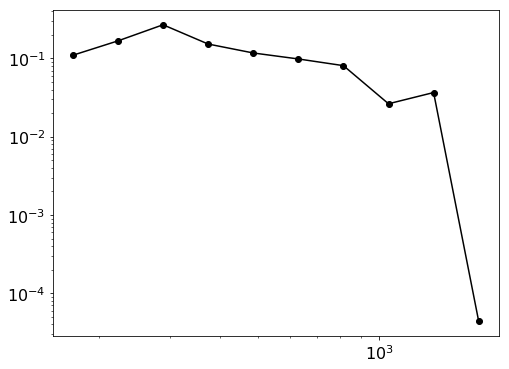

In [470]:
plt.loglog(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'o-')

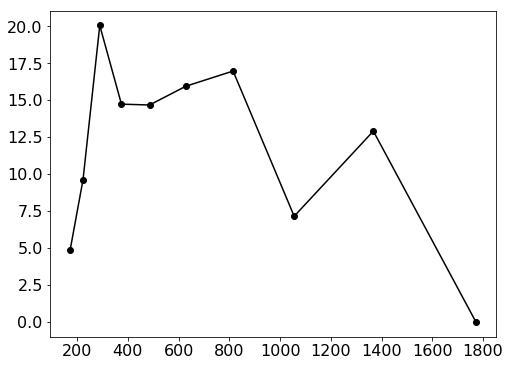

In [471]:
plt.plot(analysis.dataset.energies.energy_bin_cen,result.diff_flux_map*analysis.dataset.energies.energy_bin_wid*2*1e-2,'o-')

In [472]:
result.fit()

###################################################################

Start fitting energy bin 1/10...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_c2e0aba85727555652db8ac183ad91d8.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 673.01   21.39 565.99  26.26 282.95 531.15 922.39 2065.5    700    1.0
Abg[1]  1.9e-3  1.1e-5 2.8e-4 1.4e-3 1.7e-3 1.9e-3 2.1e-3 2.5e-3    594    1.0

Samples were drawn using NUTS at Tue Jul 14 21:29:53 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...
Summary for energy bin 2/10:

Inference for Stan mo

(0.01, 3.4717704090892165)

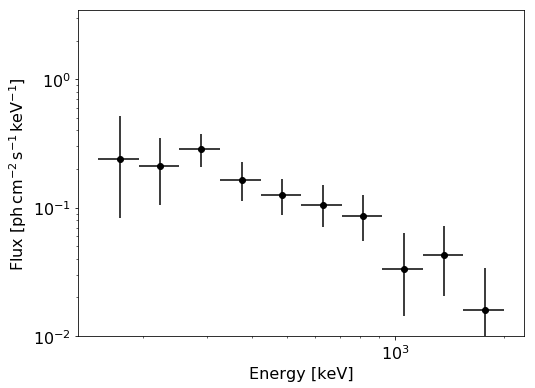

In [475]:
plt.errorbar(analysis.dataset.energy_bin_cen,
             result.diff_flux*1e-2,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result.diff_flux_err.T)*1e-2,
             marker='o',linestyle='')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,)
#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

(10.0, 749.3901894339299)

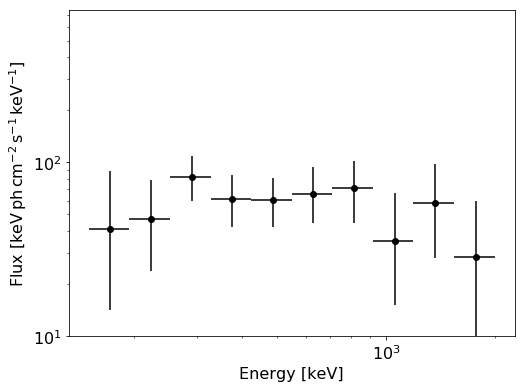

In [480]:
plt.errorbar(analysis.dataset.energy_bin_cen,
             result.diff_flux*1e-2*analysis.dataset.energy_bin_cen,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result.diff_flux_err.T)*1e-2*analysis.dataset.energy_bin_cen,
             marker='o',linestyle='')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{keV\,ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(1e1,)
#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

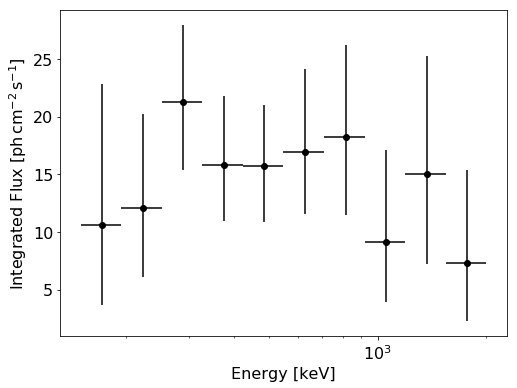

In [481]:
plt.errorbar(analysis.dataset.energy_bin_cen,
             result.diff_flux*1e-2*analysis.dataset.energy_bin_wid*2,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result.diff_flux_err.T)*1e-2*analysis.dataset.energy_bin_wid*2,
             marker='o',linestyle='')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Integrated Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}}$]')

plt.xscale('log')

In [482]:
print(result.fit_pars[2])

Inference for Stan model: anon_model_c2e0aba85727555652db8ac183ad91d8.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 1088.9    11.4 323.38 552.81 864.05 1061.9 1291.5 1798.9    805    1.0
Abg[1]  5.0e-3  2.1e-5 5.2e-4 4.1e-3 4.6e-3 4.9e-3 5.3e-3 6.0e-3    580    1.0
lp__     -1043    0.04   0.92  -1045  -1043  -1042  -1042  -1042    478   1.01

Samples were drawn using NUTS at Tue Jul 14 21:43:33 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


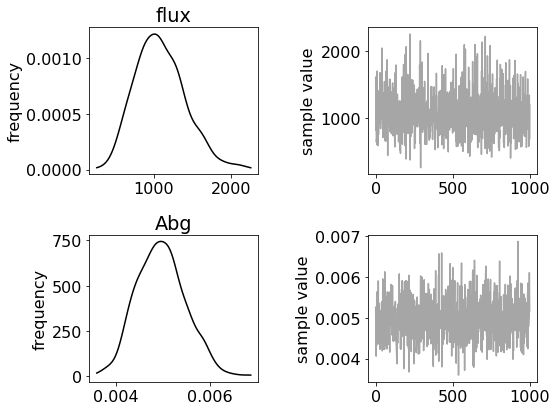

In [483]:
result.fit_pars[2].plot(['flux','Abg'])
plt.tight_layout()

In [484]:
result.fit_pars_map[2]['par']['model_tot'].sum()

107.00142619507616

In [485]:
all_counts = np.zeros(result.dataset.energies.n_energy_bins)
bg_counts = np.zeros(result.dataset.energies.n_energy_bins)
sky_counts = np.zeros(result.dataset.energies.n_energy_bins)

reduced_data = np.zeros(result.dataset.energies.n_energy_bins)

for i in range(result.dataset.energies.n_energy_bins):
    if isinstance(result.fit_pars_map[i],dict):
        all_counts[i] = result.fit_pars_map[i]['par']['model_tot'].sum()
        bg_counts[i]  = result.fit_pars_map[i]['par']['model_bg'].sum()
        sky_counts[i] = result.fit_pars_map[i]['par']['model_sky'].sum()
        reduced_data[i] = np.sum(result.count_data[i])

In [486]:
np.sum(result.count_data[5])

83.0

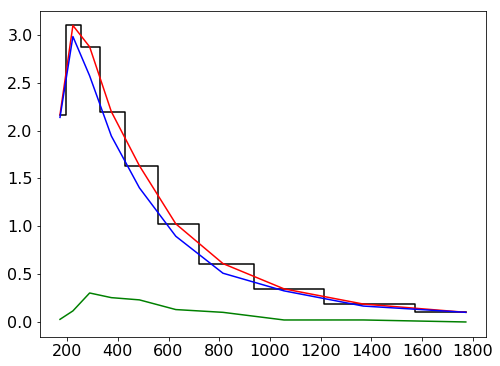

In [487]:
#
#plt.step(analysis.dataset.energy_bin_cen,np.sum(analysis.dataset.binned_data,axis=(0,2,3))/analysis.dataset.energies.energy_bin_wid,where='mid')
plt.step(analysis.dataset.energy_bin_cen,reduced_data/analysis.dataset.energies.energy_bin_wid,where='mid')
plt.plot(analysis.dataset.energy_bin_cen,all_counts/analysis.dataset.energies.energy_bin_wid)
plt.plot(analysis.dataset.energy_bin_cen,bg_counts/analysis.dataset.energies.energy_bin_wid)
plt.plot(analysis.dataset.energy_bin_cen,sky_counts/analysis.dataset.energies.energy_bin_wid)

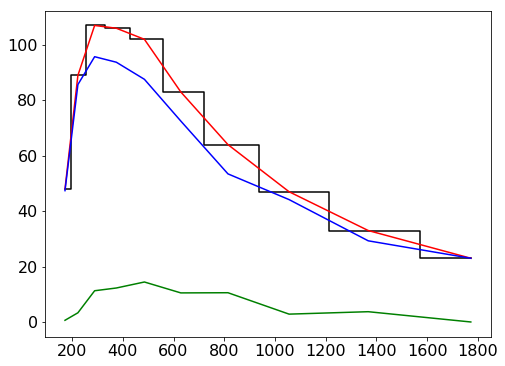

In [488]:
#
#plt.step(analysis.dataset.energy_bin_cen,np.sum(analysis.dataset.binned_data,axis=(0,2,3)),where='mid')
plt.step(analysis.dataset.energy_bin_cen,reduced_data,where='mid')
plt.plot(analysis.dataset.energy_bin_cen,all_counts)
plt.plot(analysis.dataset.energy_bin_cen,bg_counts)
plt.plot(analysis.dataset.energy_bin_cen,sky_counts)

In [548]:
np.sum(reduced_data)

702.0

In [549]:
np.sum(all_counts)

702.0176483688906

In [658]:
np.sum(sky_counts)

69.50290998280188

In [659]:
np.sum(bg_counts)

632.514738386095

In [550]:
result2 = fit(analysis.dataset,
             pointings,
             rsp,
             background)

In [551]:
result2.MAP_solution()

###################################################################
Start optimising energy bin 1/10...
###################################################################
Start optimising energy bin 2/10...
###################################################################
Start optimising energy bin 3/10...
###################################################################
Start optimising energy bin 4/10...
###################################################################
Start optimising energy bin 5/10...
###################################################################
Start optimising energy bin 6/10...
###################################################################
Start optimising energy bin 7/10...
###################################################################
Start optimising energy bin 8/10...
###################################################################
Start optimising energy bin 9/10...
################################################################

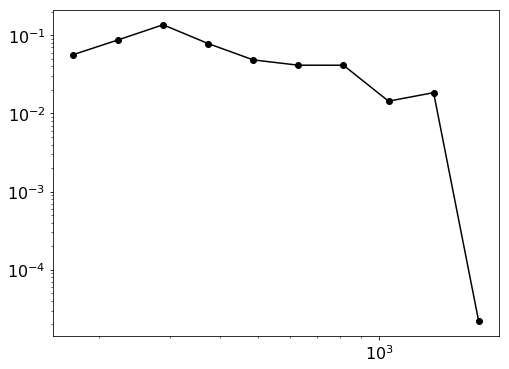

In [552]:
plt.loglog(analysis.dataset.energy_bin_cen,result2.diff_flux_map*1e-2,'o-')

In [553]:
result2.fit()

###################################################################

Start fitting energy bin 1/10...
Summary for energy bin 1/10:

Inference for Stan model: anon_model_c2e0aba85727555652db8ac183ad91d8.
2 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=1000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
flux[1] 695.19   20.57 563.67  51.59 290.05 558.93 928.04 2140.3    751    1.0
Abg[1]  1.9e-3  1.3e-5 2.7e-4 1.4e-3 1.7e-3 1.9e-3 2.1e-3 2.5e-3    461    1.0

Samples were drawn using NUTS at Tue Jul 14 22:23:49 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
###################################################################
###################################################################

Start fitting energy bin 2/10...
Summary for energy bin 2/10:

Inference for Stan mo

Text(0.5, 1.0, 'GRB160530A with COSIpy (maybe)')

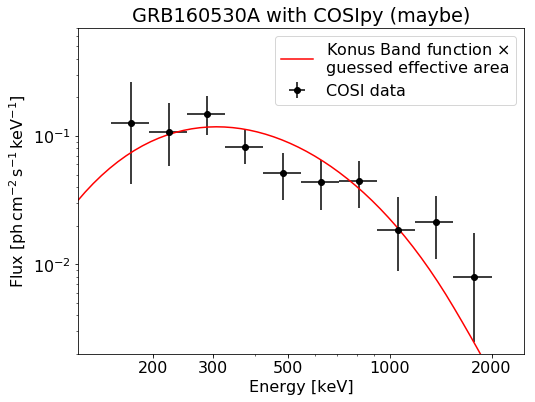

In [661]:
plt.errorbar(analysis.dataset.energy_bin_cen,
             result2.diff_flux*1e-2,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result2.diff_flux_err.T)*1e-2,
             marker='o',linestyle='',label='COSI data')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-3,7e-1)
plt.xlim(1.2e2,2.5e3)
plt.xticks(ticks=[200,300,500,1000,2000],labels=[200,300,500,1000,2000])
#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

plt.plot(x,band_function(x,[4,-0.93,-3.5,638])*np.exp(-300/x)**1.75*np.exp(-x/300)**0.25,label=r'Konus Band function $\times$'+'\nguessed effective area')
plt.legend()
plt.title('GRB160530A with COSIpy (maybe)')

Text(0.5, 1.0, 'GRB160530A with COSIpy')

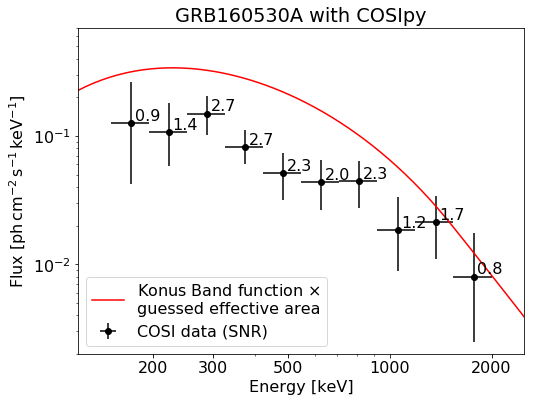

In [691]:
#analysis.dataset.plot_raw_spectrum()
plt.errorbar(analysis.dataset.energy_bin_cen,
             result2.diff_flux*1e-2,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result2.diff_flux_err.T)*1e-2,
             marker='o',linestyle='',label='COSI data (SNR)')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-3,7e-1)
plt.xlim(1.2e2,2.5e3)
plt.xticks(ticks=[200,300,500,1000,2000],labels=[200,300,500,1000,2000])

for i in range(len(snr)):
    plt.text(analysis.dataset.energy_bin_cen[i]*1.025,
             result2.diff_flux[i]*1e-2*1.05,
             str('%.1f' % snr[i]))

#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

#plt.plot(x,band_function(x,[4,-0.93,-3.5,638])*np.exp(-300/x)**1.75*np.exp(-x/300)**0.25,label=r'Konus Band function $\times$'+'\nguessed effective area')

plt.plot(x,band_function(x,[4,-0.93,-3.5,638])*np.exp(-300/x),label=r'Konus Band function $\times$'+'\nguessed effective area')

plt.legend()
plt.title('GRB160530A with COSIpy')

In [682]:
snr = result2.diff_flux/np.max(np.abs(result2.diff_flux_err),axis=1)

In [683]:
np.sqrt(np.sum(snr**2))

6.065513059794672

In [684]:
snr

array([0.90087791, 1.41403899, 2.68756316, 2.72091625, 2.29037227,
       2.01201249, 2.25680421, 1.23912528, 1.65467211, 0.83213253])

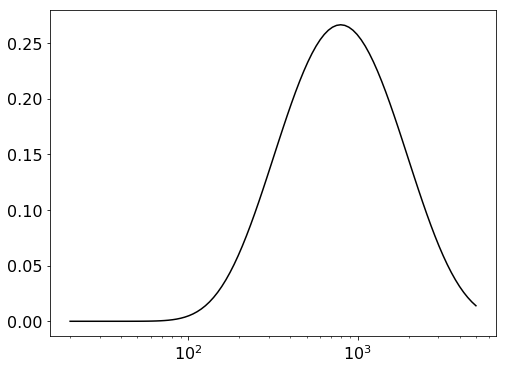

In [617]:
plt.semilogx(x,np.exp(-300/x)**1.75*np.exp(-x/300)**0.25)

Text(0.5, 1.0, 'GRB160530A with COSIpy')

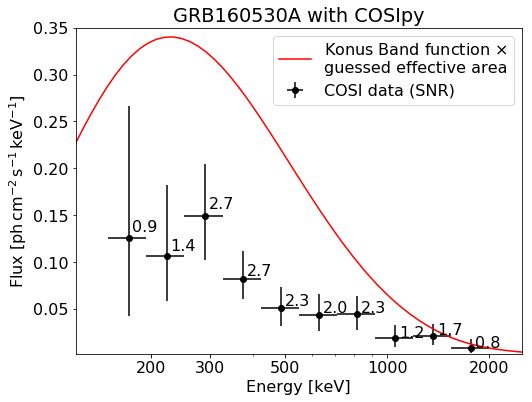

In [693]:
#analysis.dataset.plot_raw_spectrum()
plt.errorbar(analysis.dataset.energy_bin_cen,
             result2.diff_flux*1e-2,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result2.diff_flux_err.T)*1e-2,
             marker='o',linestyle='',label='COSI data (SNR)')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
#plt.yscale('log')
plt.ylim(2e-3,0.35)
plt.xlim(1.2e2,2.5e3)
plt.xticks(ticks=[200,300,500,1000,2000],labels=[200,300,500,1000,2000])

for i in range(len(snr)):
    plt.text(analysis.dataset.energy_bin_cen[i]*1.025,
             result2.diff_flux[i]*1e-2*1.05,
             str('%.1f' % snr[i]))

#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

#plt.plot(x,band_function(x,[4,-0.93,-3.5,638])*np.exp(-300/x)**1.75*np.exp(-x/300)**0.25,label=r'Konus Band function $\times$'+'\nguessed effective area')

plt.plot(x,band_function(x,[4,-0.93,-3.5,638])*np.exp(-300/x),label=r'Konus Band function $\times$'+'\nguessed effective area')

plt.legend()
plt.title('GRB160530A with COSIpy')

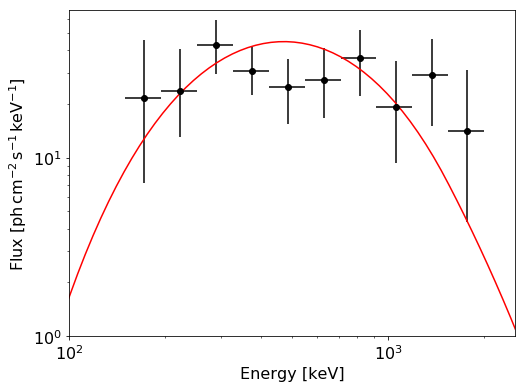

In [622]:
plt.errorbar(analysis.dataset.energy_bin_cen,
             result2.diff_flux*1e-2*analysis.dataset.energy_bin_cen,
             xerr=analysis.dataset.energy_bin_wid,
             yerr=np.abs(result2.diff_flux_err.T)*1e-2*analysis.dataset.energy_bin_cen,
             marker='o',linestyle='')

plt.xlabel('Energy [keV]')
plt.ylabel(r'Flux [$\mathrm{ph\,cm^{-2}\,s^{-1}\,keV^{-1}}$]')

plt.axhline(0,linestyle='--')


plt.xscale('log')
plt.yscale('log')
plt.ylim(1e0,)
plt.xlim(1e2,2.5e3)
#plt.plot(analysis.dataset.energy_bin_cen,result.diff_flux_map*1e-2,'ro-')

plt.loglog(x,band_function(x,[4,-0.93,-3.5,638])*x*np.exp(-300/x)**1.75*np.exp(-x/300)**0.25)

In [623]:
all_counts2 = np.zeros(result2.dataset.energies.n_energy_bins)
bg_counts2 = np.zeros(result2.dataset.energies.n_energy_bins)
sky_counts2 = np.zeros(result2.dataset.energies.n_energy_bins)

reduced_data2 = np.zeros(result2.dataset.energies.n_energy_bins)

for i in range(result2.dataset.energies.n_energy_bins):
    if isinstance(result2.fit_pars_map[i],dict):
        all_counts2[i] = result2.fit_pars_map[i]['par']['model_tot'].sum()
        bg_counts2[i]  = result2.fit_pars_map[i]['par']['model_bg'].sum()
        sky_counts2[i] = result2.fit_pars_map[i]['par']['model_sky'].sum()
        reduced_data2[i] = np.sum(result2.count_data[i])

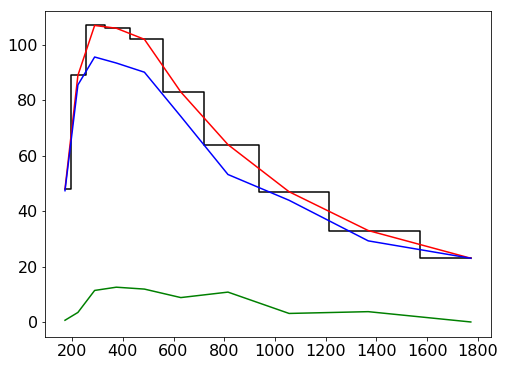

In [626]:
#
#plt.step(analysis.dataset.energy_bin_cen,np.sum(analysis.dataset.binned_data,axis=(0,2,3))/analysis.dataset.energies.energy_bin_wid,where='mid')
plt.step(analysis.dataset.energy_bin_cen,reduced_data2,where='mid')
plt.plot(analysis.dataset.energy_bin_cen,all_counts2)
plt.plot(analysis.dataset.energy_bin_cen,bg_counts2)
plt.plot(analysis.dataset.energy_bin_cen,sky_counts2)

In [559]:
def band_function(x,p):
    """
    p[0] = norm
    p[1] = alpha
    p[2] = beta
    p[3] = Epeak
    """
    val = np.zeros(len(x))
    ebreak = (p[1]-p[2])*p[3]/(2+p[1])
    lo = np.where(x  < ebreak)[0]
    hi = np.where(x >= ebreak)[0]
    val[lo] = p[0] * (x[lo]/100)**p[1] * np.exp(-x[lo]*(2+p[1])/p[3])
    val[hi] = p[0] * (ebreak/100)**(p[1]-p[2]) * np.exp(p[2]-p[1]) * (x[hi]/100)**p[2]
    return val

In [567]:
x = np.logspace(np.log10(20),np.log10(5000),100)

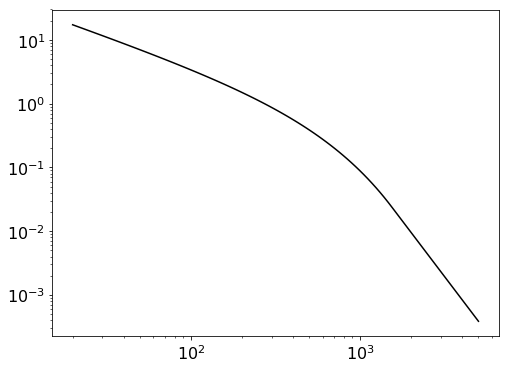

In [584]:
plt.loglog(x,band_function(x,[4,-0.93,-3.5,638]))

In [583]:
np.sum(np.diff(x)*band_function(x,[4,-0.93,-3.5,638])[0:-1])*68.3*(u.keV).to(u.erg)

0.0001306581401399159

In [579]:
np.sum(band_function(x,[1,-0.93,-3.5,638])/np.sum(band_function(x,[1,-0.93,-3.5,638]))*x)

68.31687938448493

In [574]:
from astropy import units as u

In [576]:
(u.keV).to(u.erg)

1.6021766208e-09

In [291]:
analysis.dataset.binned_data.shape

(1, 10, 36, 1650)

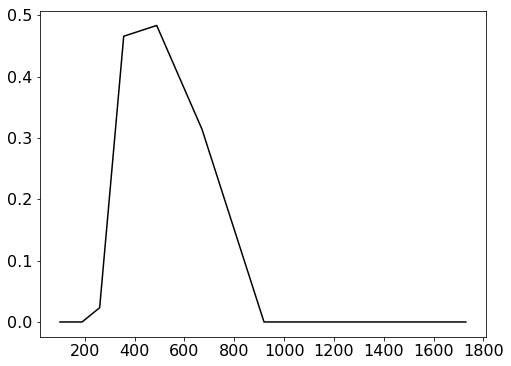

In [300]:
plt.plot(analysis.dataset.energy_bin_cen,sky_counts/analysis.dataset.energy_bin_wid)

In [153]:
np.sum(all_counts),np.sum(analysis.dataset.binned_data)

(2649.9107520640378, 2649.0)

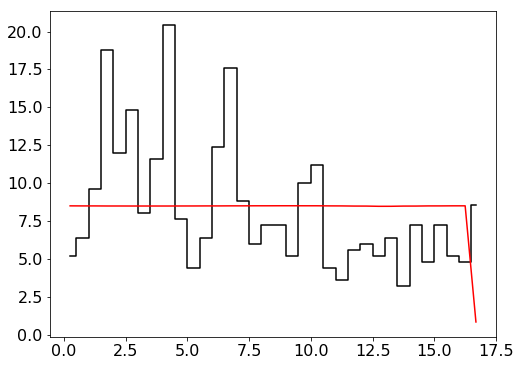

In [490]:
all_counts_time = np.sum(np.array([result.fit_pars_map[i]['par']['model_tot'] for i in range(10)]),axis=(0))
plt.step(analysis.dataset.times.times_cen,np.sum(analysis.dataset.binned_data,axis=(1,2,3))/analysis.dataset.times.times_wid/10,where='mid')
plt.plot(analysis.dataset.times.times_cen,all_counts_time/analysis.dataset.times.times_wid/10)

In [102]:
for i in range(result.dataset.n_energy_bins):
    print(result.count_data[i].shape,
          result.response.sky_response[i].shape,
          result.background.bg_model_reduced[i].shape)

(24, 13) (24, 13) (24, 13)
(24, 380) (24, 380) (24, 380)
(24, 1048) (24, 1048) (24, 1048)
(24, 1649) (24, 1649) (24, 1649)
(24, 2026) (24, 2026) (24, 2026)
(24, 2306) (24, 2306) (24, 2306)
(24, 2503) (24, 2503) (24, 2503)
(24, 2718) (24, 2718) (24, 2718)
(24, 1759) (24, 1759) (24, 1759)
(24, 2376) (24, 2376) (24, 2376)
(24, 2755) (24, 2755) (24, 2755)
(24, 2754) (24, 2754) (24, 2754)
(24, 2670) (24, 2670) (24, 2670)
(24, 2625) (24, 2625) (24, 2625)
(24, 2499) (24, 2499) (24, 2499)
(24, 2384) (24, 2384) (24, 2384)
(24, 2315) (24, 2315) (24, 2315)
(24, 2308) (24, 2308) (24, 2308)
(24, 2147) (24, 2147) (24, 2147)


In [98]:
result.count_data[2].shape

(24, 1048)

In [89]:
analysis.dataset.n_energy_bins

19

In [662]:
bg_filename = 'BG9dets_LingWithPeak_simOP_160628_FullDay_CE0000-1000keV_EHCstandard.tra.gz'
bg_filename = 'grb_full_merge.tra'
bg_data2 = COSIpy(data_dir,bg_filename)
bg_data2.read_COSI_DataSet()

In [663]:
bg_data2.dataset.time_binning_tags(time_bin_size=5)
bg_data2.dataset.init_binning(energy_bin_edges=energy_bin_edges,
                              pixel_size=5.)
bg_data2.dataset.get_binned_data()

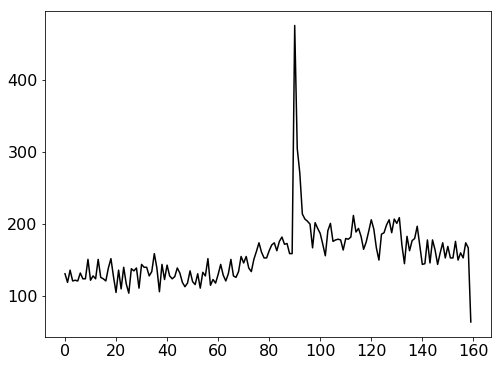

In [676]:
plt.plot(np.sum(bg_data2.dataset.binned_data,axis=(2,3))[:,0])

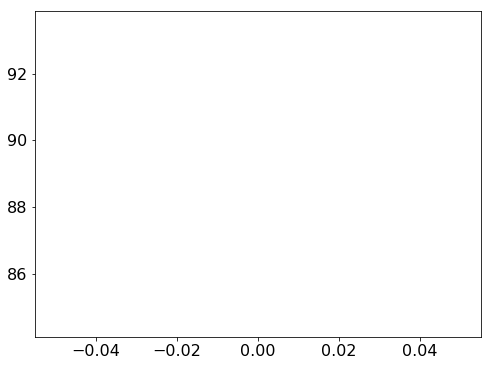

In [678]:
plt.plot(np.sum(analysis.dataset.binned_data,axis=(2,3))[:,1])

In [ ]:
break

In [ ]:
rsp.

In [ ]:
background.bg_model.shape

In [ ]:
import pickle

In [ ]:
#read filename.pkl (if already compiled)
model = pickle.load(open('../../testing/for-students/nova_analysis/spimodfit.pkl', 'rb'))

In [ ]:
model.show()

In [ ]:
background.bg_response.shape

In [ ]:
bgmodel = background.bg_model[:,8,:,:].reshape(24,36*1650)[:,calc_this]

In [ ]:
bgmodel.shape

In [ ]:
yp = analysis.dataset.binned_data[:,8,:,:].reshape(24,36*1650)[:,calc_this]

In [ ]:
yp.shape

In [ ]:
plt.plot(np.sum(yp,axis=1))
plt.plot(np.sum(bgmodel,axis=1))
plt.plot(np.sum(model_sky,axis=1)*1e-2)
plt.plot(np.sum(bgmodel,axis=1) + np.sum(model_sky,axis=1)*1e-2)

In [ ]:
plt.plot(np.sum(model_sky,axis=1)*1e-2)

In [ ]:
rsp.rsp.response_grid_normed

In [ ]:
rsp.

In [ ]:
Np, Nrsp = bgmodel.shape         # initialise sizes of arrays
N = Np*Nrsp                      # total number of data points

mu_flux_scl = np.array([1.])    # prior centroids for sky, we use 10 because we are ignorant;
# this has to be an array because it could be more than one
sigma_flux_scl = np.array([1.]) # same for the width (so, easily 0 but also high values possible)
mu_Abg = 1.                     # for the moment set to a useful value (because we didn't do anything else, yet)
sigma_Abg = 1                  # same


# background cuts (here only one parameter for all times)
#bg_cuts, idx_arr, Ncuts = make_bg_cuts([],Np)

# dictionary for data set and prior
data2D = dict(N = Nrsp,
              Np = Np,
              Nsky = 1,
              Ncuts = background.Ncuts,
              bg_cuts = background.bg_cuts,
              bg_idx_arr = background.idx_arr,
              y = yp.ravel().astype(int)[:,],
              bg_model = bgmodel,
              conv_sky = model_sky.reshape(1,Np,Nrsp)*1e-2, # this has to be reshaped because it could be more than one
              mu_flux = mu_flux_scl,
              sigma_flux = sigma_flux_scl,
              mu_Abg = mu_Abg,
              sigma_Abg = sigma_Abg)

In [ ]:
import time

In [ ]:
init = {}
init['flux'] = np.array([1.])
init['Abg'] = np.repeat(1.,background.Ncuts)
start = time.time()
op = model.optimizing(data=data2D,verbose=True,init=init,as_vector=False,tol_rel_grad=1e4)
print(time.time()-start)
op

In [ ]:
plt.step(np.arange(24),np.sum(yp,axis=1))
plt.step(np.arange(24),op['par']['model_tot'])
plt.step(np.arange(24),op['par']['model_bg'])
plt.step(np.arange(24),op['par']['model_sky'][0])

In [ ]:
fit = model.sampling(data=data2D,chains=2,iter=1000,n_jobs=-1,verbose=True)

In [ ]:
print(fit.stansummary(['flux','Abg']))

In [ ]:
fit.plot(['flux','Abg'])
plt.tight_layout()

In [ ]:
plt.plot( np.sqrt(np.cumsum((op['par']['model_sky'][0,:]/np.sqrt(op['par']['model_tot']))**2)))

In [ ]:
plt.plot( np.sqrt(np.cumsum((np.median(fit['model_sky'],axis=(0,1))/np.sqrt(np.median(fit['model_tot'],axis=0)))**2))  )

In [ ]:
Np

In [ ]:
fit['model_sky'][:,0,:].shape

In [ ]:
np.percentile(fit['model_sky'][:,0,:],50-95.4/2,axis=(0)).shape

In [ ]:
np.sum(sky_data.dataset.binned_data,axis=(2,3))[7,:].shape

In [ ]:
sky_data.dataset.binned_data.shape

In [ ]:
plt.step(np.arange(11),np.sum(sky_data.dataset.binned_data,axis=(2,3))[:,8])
print('dataset:',np.sum(np.sum(sky_data.dataset.binned_data,axis=(2,3))[:,8]))
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_sky'][:,0,:],50-95.4/2,axis=(0)),
                 np.percentile(fit['model_sky'][:,0,:],50+95.4/2,axis=(0)),color='red',alpha=0.5,step='pre')
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_sky'][:,0,:],50-68.3/2,axis=(0)),
                 np.percentile(fit['model_sky'][:,0,:],50+68.3/2,axis=(0)),color='red',alpha=0.5,step='pre')
print('fit:',np.percentile(np.sum(fit['model_sky'],axis=(1,2)),50+np.array([-95.4,-68.3,0,68.3,95.4])/2))

In [ ]:
sky_data.dataset.data['TimeTags'].min()-bg_data.dataset.data['TimeTags'].min()

In [ ]:
#sky_data.dataset.data['TimeTags'] -= 2682.1905336380005

In [ ]:
#TS: need to include arbitrary time binning from other data set to compare to!

In [ ]:
sky_data.dataset.times.times_edges

In [ ]:
bg_data.dataset.binned_data.shape

In [ ]:
plt.step(np.arange(Np),np.sum(bg_data.dataset.binned_data,axis=(2,3))[:,8])
print('dataset:',np.sum(np.sum(bg_data.dataset.binned_data,axis=(2,3))[:,8]))
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_bg'][:,:],50-95.4/2,axis=(0)),
                 np.percentile(fit['model_bg'][:,:],50+95.4/2,axis=(0)),color='red',alpha=0.5,step='pre')
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_bg'][:,:],50-68.3/2,axis=(0)),
                 np.percentile(fit['model_bg'][:,:],50+68.3/2,axis=(0)),color='red',alpha=0.5,step='pre')
print('fit:',np.percentile(np.sum(fit['model_bg'],axis=(1)),50+np.array([-95.4,-68.3,0,68.3,95.4])/2))

In [ ]:
plt.step(np.arange(Np),np.sum(analysis.dataset.binned_data,axis=(2,3))[:,8])
print('dataset:',np.sum(np.sum(analysis.dataset.binned_data,axis=(2,3))[:,8]))
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_tot'][:,:],50-95.4/2,axis=(0)),
                 np.percentile(fit['model_tot'][:,:],50+95.4/2,axis=(0)),color='red',alpha=0.5,step='pre')
plt.fill_between(np.arange(Np),
                 np.percentile(fit['model_tot'][:,:],50-68.3/2,axis=(0)),
                 np.percentile(fit['model_tot'][:,:],50+68.3/2,axis=(0)),color='red',alpha=0.5,step='pre')
print('fit:',np.percentile(np.sum(fit['model_tot'],axis=(1)),50+np.array([-95.4,-68.3,0,68.3,95.4])/2))

In [ ]:
np.percentile(np.sum(fit['model_sky'],axis=(1,2)),50+np.array([-95.4,-68.3,0,68.3,95.4])/2)

In [ ]:
fit['model_sky'].shape

In [ ]:
background.Ncuts

In [ ]:
background.bg_model.shape

In [ ]:
break

In [ ]:
break

In [ ]:
analysis.dataset.binned_data.shape

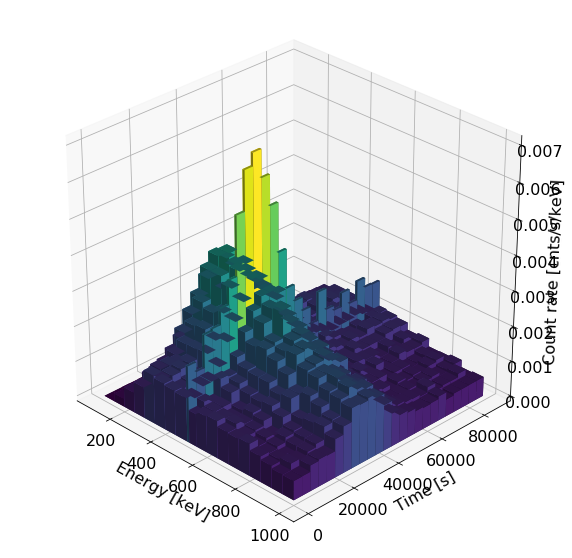

In [121]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(analysis.dataset.energies.energy_bin_min,analysis.dataset.times.times_min)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx, dy = np.meshgrid(analysis.dataset.energies.energy_bin_wid*2,analysis.dataset.times.times_wid*2)
dx = dx.flatten()
dy = dy.flatten()
dz = analysis.dataset.energies.energy_spec_data.flatten()

cmap = plt.cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='max')

ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Time [s]')
ax.set_zlabel('Count rate [cnts/s/keV]')

ax.view_init(30,315)

#ax.view_init(90,90)


In [ ]:
xpos.shape,ypos.shape,zpos.shape,dx.shape,dy.shape,dz.shape